In [201]:
# /usr/bin/env python

import matplotlib.pyplot as plt
import subprocess
import os

In [202]:
output_filename = "spent_time.txt"

In [236]:
def benchmark(tool_name='./dot'):
    # TODO Use an API to retrieve hardware-supported threads count
    thread_count = 8
    with open(output_filename, "w") as f:
        print("Using file: ", output_filename)
    
    for i in range(0, thread_count):
        with open(output_filename, "a+") as f:
            subprocess.Popen("./apply --vecLen=1024", 
                             shell=True,
                             stdout=f,
                             env={'CHPL_RT_NUM_THREADS_PER_LOCALE': str(i+1)}).wait()

In [237]:
def read_benchmark_results():
    content = []
    with open(output_filename, "r") as f:
        content = f.read()
        
    thread_count = []
    time_spent = []
    current_thread = 1
    for line in content.split('\n'):
        thread_count.append(current_thread)
        current_thread += 1
        if len(line) != 0:
            time_spent.append(float(line))
        else:
            del thread_count[-1]

    return thread_count, time_spent
        

In [238]:
def visualize(thread_idx, time_spent_for_thread):
    plt.grid()
    plt.plot(thread_idx, time_spent_for_thread)

Using file:  spent_time.txt
thread_count:  [1, 2, 3, 4, 5, 6, 7, 8]
time_spent:  [111.433, 60.6621, 46.4003, 35.5963, 31.2939, 29.9802, 27.23, 26.248]


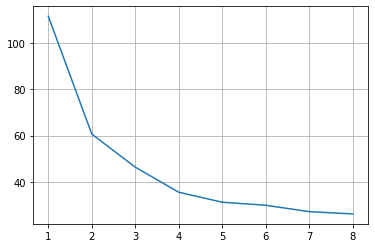

In [239]:
def main():
    benchmark()
    x, y = read_benchmark_results()
    print('thread_count: ', x)
    print('time_spent: ', y)
    visualize(x, y)


main()